# PAM test

In [1]:
import numpy as np
import scipy as sp
import sys
from sklearn.cluster import KMeans as sKMeans
from sklearn_extra.cluster import KMedoids
from math import atan2, cos, sin, sqrt
import matplotlib.pyplot as plt
from random import sample
import random
import pandas as pd
from sklearn.datasets import make_blobs
from scipy.stats import skewnorm
import seaborn as sb; sb.set()  

%matplotlib inline
%load_ext autoreload

In [2]:
from platform import python_version
python_version()

'3.8.10'

In [3]:
sys.path.append("/home/gmancini/Dropbox/appunti/Clustering/src")
import mdutils
import myclusters
import myvalidation
%autoreload 2

# Test - customer segmentation

see https://medium.com/@dey.mallika/unsupervised-learning-with-weighted-k-means-3828b708d75d

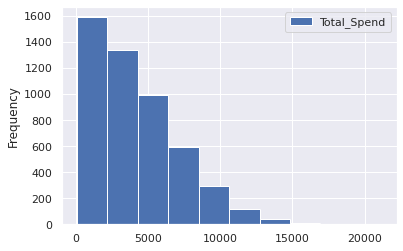

In [4]:
X, y = make_blobs(n_samples=5000, centers=4, n_features=2, random_state=25)
df = pd.DataFrame(dict(Pct_Spend_in_Organic=(X[:,0])+10, Pct_Spend_in_Local=(X[:,1])+10))
df['Total_Spend']=(skewnorm.rvs(1000,size=5000)*5000)+100
ax=df.reset_index().plot(x='index',y="Total_Spend",kind="hist")

In [5]:
df

,Pct_Spend_in_Organic,Pct_Spend_in_Local,Total_Spend
0,6.666011,2.421987,5944.098320
1,18.214584,10.729393,10575.825078
2,15.714767,10.651138,1174.332175
3,7.898742,1.364515,5426.867785
4,9.351868,3.672406,922.256954
...,...,...,...
4995,8.330355,2.507292,2806.251412
4996,18.411906,11.998805,392.236010
4997,8.791952,3.091321,6685.162898
4998,18.154177,13.114608,755.799329


Text(0, 0.5, 'Pct Spend in Organic')

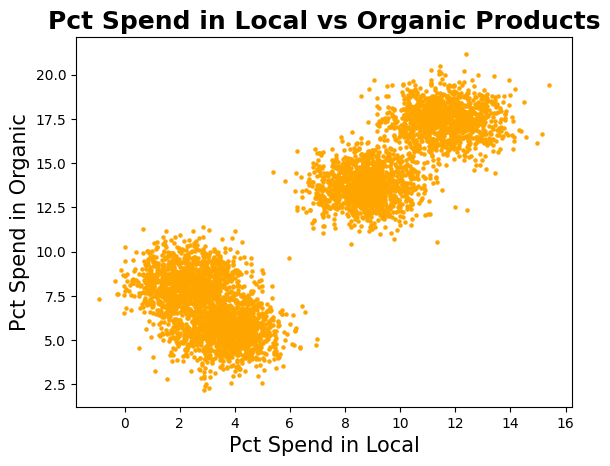

In [6]:
plt.style.use('default')
x=np.array(df['Pct_Spend_in_Local'])
y=np.array(df['Pct_Spend_in_Organic'])
plt.scatter(x, y, s=5, cmap='viridis',c='orange',label='Spend in Organic Products')
plt.title('Pct Spend in Local vs Organic Products',fontsize=16, fontweight='bold')
plt.xlabel('Pct Spend in Local',fontsize=12)
plt.ylabel('Pct Spend in Organic',fontsize=12)

### SK KMeans

### Unweighted

In [7]:
skmeans = sKMeans(n_clusters=5, random_state=0, max_iter=1000)
X = np.array(df.drop(['Total_Spend'], 1).astype(float))
Y = np.array(df['Total_Spend'].astype(float))

kmeansclus = skmeans.fit(X)
predicted_kmeans = skmeans.predict(X)

/tmp/ipykernel_1558379/267638362.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Total_Spend'], 1).astype(float))


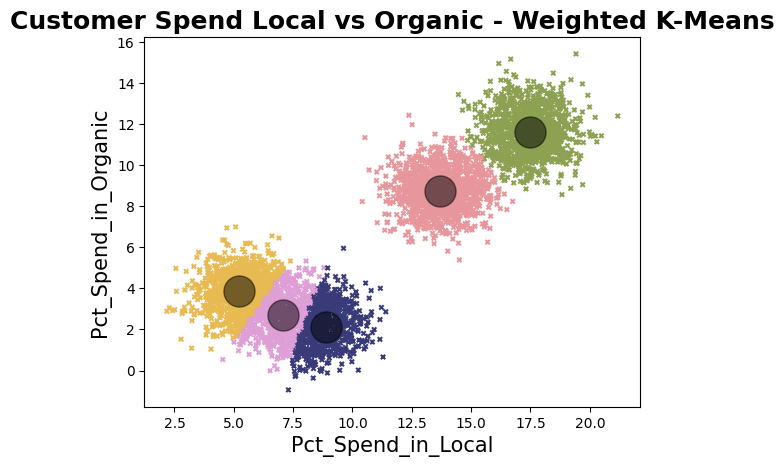

In [8]:
plt.style.use('default')
plt.scatter(X[:,0], X[:,1], c=kmeansclus.labels_.astype(float),s=10,cmap='tab20b',marker='x')
plt.title('Customer Spend Local vs Organic - Unweighted K-Means',fontsize=16, fontweight='bold')
plt.xlabel('Pct_Spend_in_Local',fontsize=12)
plt.ylabel('Pct_Spend_in_Organic',fontsize=12) 
centers = kmeansclus.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5);

### Weighted

In [9]:
skmeans = sKMeans(n_clusters=5, random_state=0, max_iter=1000)
X = np.array(df.drop(['Total_Spend'], 1).astype(float))
Y = np.array(df['Total_Spend'].astype(float))

wt_kmeansclus = skmeans.fit(X,sample_weight = Y)
predicted_kmeans = skmeans.predict(X, sample_weight = Y)

/tmp/ipykernel_1558379/2567225054.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Total_Spend'], 1).astype(float))


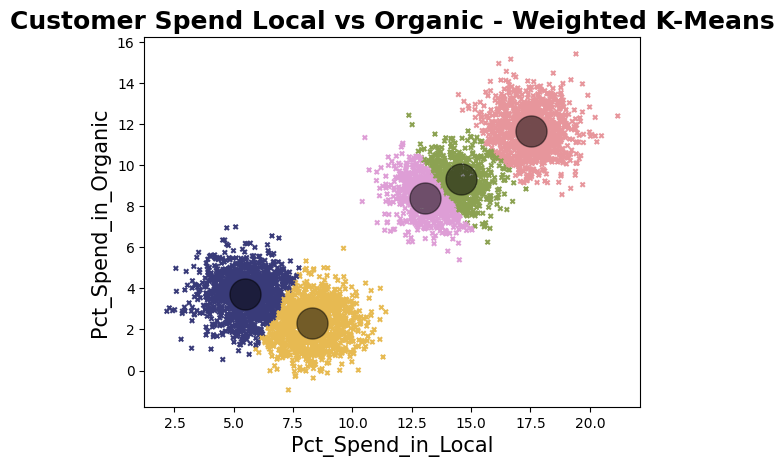

In [10]:
plt.style.use('default')
plt.scatter(X[:,0], X[:,1], c=wt_kmeansclus.labels_.astype(float),s=10,cmap='tab20b',marker='x')
plt.title('Customer Spend Local vs Organic - Weighted K-Means',fontsize=16, fontweight='bold')
plt.xlabel('Pct_Spend_in_Local',fontsize=12)
plt.ylabel('Pct_Spend_in_Organic',fontsize=12) 
centers = wt_kmeansclus.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5);

In [11]:
wt_kmeansclus.cluster_centers_

array([[ 5.45875941,  3.71393497],
       [14.56617724,  9.31173121],
       [ 8.30786301,  2.29465423],
       [17.53488167, 11.66699213],
       [13.06404252,  8.38382345]])

### my KMeans

In [12]:
X.shape, Y.shape

((5000, 2), (5000,))

In [13]:
my_estimator = myclusters.KMeans(K=5,niter=1000,nrun=2,\
                               boot='random',conv=1e-5,metric="euclidean")
my_estimator.do_clustering(X=X, W=Y)
clusters = my_estimator.clusters
centers = my_estimator.centers

In [14]:
centers

array([[14.64480027,  9.29330934],
       [13.06738492,  8.43682573],
       [ 8.31060811,  2.29287088],
       [17.5410651 , 11.67727782],
       [ 5.46181492,  3.71282651]])

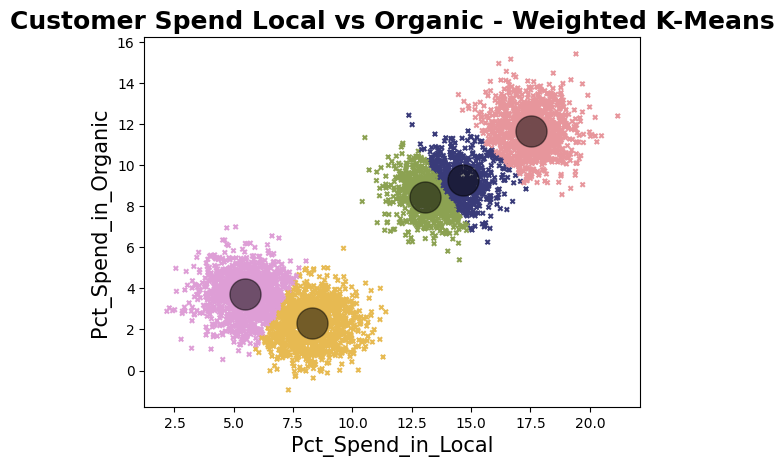

In [15]:
plt.style.use('default')
plt.scatter(X[:,0], X[:,1], c=clusters.astype(float),s=10,cmap='tab20b',marker='x')
plt.title('Customer Spend Local vs Organic - Weighted K-Means',fontsize=16, fontweight='bold')
plt.xlabel('Pct_Spend_in_Local',fontsize=12)
plt.ylabel('Pct_Spend_in_Organic',fontsize=12) 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5);

### weighted PAM

In [16]:
my_estimator = myclusters.PAM(K=5, niter=1000, metric="euclidean", debug=True)
cost, medoids = my_estimator.do_clustering(X=X, W=Y, doswap=True)
clusters = my_estimator.clusters 
cost, medoids, my_estimator.nswap

inertia and medoids b4 swap 6.611969129460643 [4942, 1106, 3647, 526, 1830]


(5.633490275944143, [1352, 2285, 1104, 2158, 2707], 19)

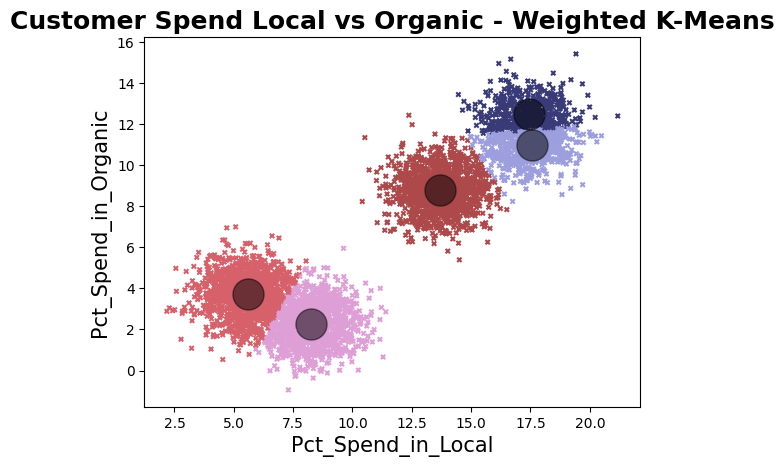

In [18]:
plt.style.use('default')
plt.scatter(X[:,0], X[:,1], c=clusters.astype(float),s=10,cmap='tab20b',marker='x')
plt.title('Customer Spend Local vs Organic - Weighted K-Means',fontsize=18, fontweight='bold')
plt.xlabel('Pct_Spend_in_Local',fontsize=15)
plt.ylabel('Pct_Spend_in_Organic',fontsize=15) 
plt.scatter(X[medoids, 0], X[medoids, 1], c='black', s=500, alpha=0.5);